
# Προπαρασκευαστική εργασία 1
## Λένα Φωτάκη : 031 14793
## Ιωάννης Παλιάκης:031 14877  


### Βήμα 1
Διαβάζουμε και αποθηκεύουμε στις μορφές που ζητήθηκαν 

In [96]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

#erwtima 1
Y_train = np.loadtxt("train.txt", delimiter=" ", usecols=[0])
Y_test  = np.loadtxt("test.txt", delimiter=" ", usecols=[0])
X_train = np.loadtxt("train.txt", delimiter=" ", usecols=range(1,257))
X_test  = np.loadtxt("test.txt", delimiter=" ", usecols=range(1,257))

### Βήμα 2


Τυπώνουμε το 131 ψηφίο

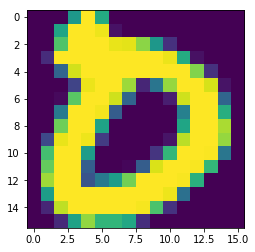

In [97]:
image=np.reshape(X_train[130],(16,16))
plt.imshow(image)

### Βήμα 3


Τυπώνουμε μέχρι να βρούμε 10 διαφορετικά ψηφία και σταματάμε την λούπα

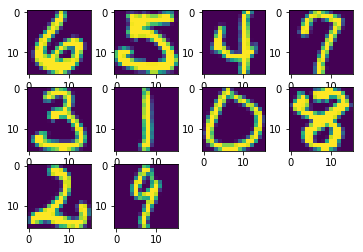

In [98]:
ar=[0]*10
axs = plt.subplots(10)
k=0    
tr = Y_train.shape[0]
for i in range(tr):
    if k==10:
        break
    index=int(Y_train[i])
    if ar[index]==0:
        image=np.reshape(X_train[i],(16,16))
        plt.subplot(3,4,k+1)
        plt.imshow(image)
        ar[index]+=1
        k+=1
plt.show()  

        
        
        

### Βήμα 4

Για κάθε ψηφίο που είναι 0 παίρνουμε τα pixel του και φτιάχνουμε ένα καινούργιο πίνακα (16,16). Κρατάμε όλα τα pixel που βρίσκονται στη θέση (10,10) και υπολογίζουμε το mean τους.

In [99]:
total=0
# sum1=0
zeros=[]
pixel=[]
for i in range(tr):
    if int(Y_train[i])==0:
        zeros.append(X_train[i])
        array=np.reshape(X_train[i],(16,16))
        pixel.append(array[10][10])
#         sum1+=array[10][10]
#         sum1+=X_train[i][10*16 + 10]
        total+=1
#print(sum1/total)
mean_of_pixel_10_10 = np.mean(pixel)
print(mean_of_pixel_10_10)

-0.5041884422110553


### Βήμα 5


Η διασπορά αυτού του πίνακα (του ίδιου που χρησιμοποιήσαμε για το mean)

In [100]:
var_of_pixel_10_10 = stat.variance(pixel)
print(var_of_pixel_10_10)
    
    

0.5249618093885184


### Βήμα 6


Καινούργιος πίνακας για κάθε πίξελ και επαναλαμβάνουμε την από πάνω διαδικασία (τυπώνουμε το 10x10 πιξελ για να δέιξουμε πως είναι το ίδιο με από πάνω σε mean και variance)

In [101]:
rows, cols = (256, total) 
total_zeros_ar = [[0]*cols]*rows 
mean_of_zeros=[0]*256
variance_of_zeros=[0]*256
for j in range(256):
    for i in range(total):
        total_zeros_ar[j][i]=zeros[i][j]
    mean_of_zeros[j]=stat.mean(total_zeros_ar[j])
    variance_of_zeros[j]=stat.variance(total_zeros_ar[j])
print(mean_of_zeros[170],variance_of_zeros[170])

-0.5041884422110553 0.5249618093885184


### Βήμα 7

Απλός σχεδιασμός του ψηφίου με χρήση των τιμών μέσης της τιμής από το προηγούμενο βήμα.

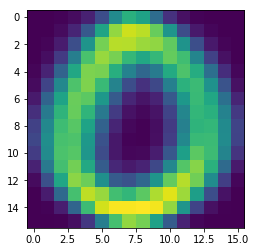

In [102]:
image=np.reshape(mean_of_zeros,(16,16))
plt.imshow(image)

### Βήμα 8

Η εικόνα που τυπώσαμε από το variance στην περιφέρεια του κύκλου έχει μεγαλύτερο όγκο.Αυτό συμβαίνει διότι σε αυτά τα σημεία οι διαφορές των πίξελ από την μέση τιμή είναι πολύ πιο μεγάλες από τα άλλα σημεία και για αυτό έχει και μεγαλύτερη τιμή το variance εκεί. Ακόμη το γεγονός ότι εσωτερικά της περιφέρειας είναι αρκετά λαμπρό σημαίνει ότι η διαφορά των τιμών από την μέση τιμή σε αυτά τα σημεία είναι πιο έντονη.

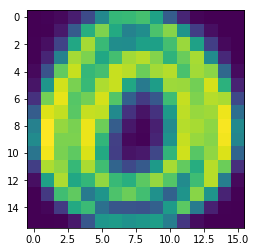

In [103]:
image=np.reshape(variance_of_zeros,(16,16))
plt.imshow(image)

### Βήμα 9α


Ουσιαστικά κάνουμε την ίδια διαδικασία με παραπάνω έχοντας προσθέσει μία παραπάνω διάσταση στους πίνακες για τα ψηφία

In [104]:
dif_by_num_ar = []
arr_divided_by_pixel_of_all_digits= []
how_many = [0]*10
arr_with_means = [] 
for i in range(10):
    arr_divided_by_pixel_of_all_digits.append([])
    dif_by_num_ar.append([])
    arr_with_means.append([])
    for j in range(256):
        arr_divided_by_pixel_of_all_digits[i].append([])
for i in range (tr):
    number = int(Y_train[i])
    how_many[number]+=1
    dif_by_num_ar[number].append(X_train[i])
for i in range(10):
    for j in range(256):
        for k in range(how_many[i]):
            arr_divided_by_pixel_of_all_digits[i][j].append(dif_by_num_ar[i][k][j])
for i in range(10):
    for j in range(256):
        arr_with_means[i].append(stat.mean(arr_divided_by_pixel_of_all_digits[i][j]))
for i in range(10):
    print("stats of digit ",i,":")
    for j in range(256):
        print("mean: ",i,j,arr_with_means[i][j],"variance: ",stat.variance(arr_divided_by_pixel_of_all_digits[i][j]))

stats of digit  0 :
mean:  0 0 -0.9986281407035176 variance:  0.002247105527638191
mean:  0 1 -0.9953978224455612 variance:  0.00661218108494414
mean:  0 2 -0.9849229480737018 variance:  0.019607043513179195
mean:  0 3 -0.941251256281407 variance:  0.06295392508224273
mean:  0 4 -0.8333425460636515 variance:  0.18051771072813075
mean:  0 5 -0.5714229480737019 variance:  0.3724256876875296
mean:  0 6 -0.13158458961474037 variance:  0.5321290661831088
mean:  0 7 0.15260804020100502 variance:  0.5386525838749489
mean:  0 8 0.04628391959798995 variance:  0.5630578497495862
mean:  0 9 -0.35370100502512564 variance:  0.4580043908288298
mean:  0 10 -0.741248743718593 variance:  0.23612581988526032
mean:  0 11 -0.9209162479061976 variance:  0.082746842937796
mean:  0 12 -0.9850251256281407 variance:  0.012196822503127541
mean:  0 13 -0.9971825795644891 variance:  0.002346974180766925
mean:  0 14 -0.9999346733668342 variance:  2.2505486358868988e-06
mean:  0 15 -1.0 variance:  0.0
mean:  0 16 -

mean:  0 163 0.34223115577889446 variance:  0.5985172876789648
mean:  0 164 -0.042413735343383586 variance:  0.751394656843873
mean:  0 165 -0.5742194304857622 variance:  0.4831126777109914
mean:  0 166 -0.8858601340033501 variance:  0.1469366484848102
mean:  0 167 -0.9659170854271357 variance:  0.0405883409819424
mean:  0 168 -0.9577788944723619 variance:  0.05445430815435097
mean:  0 169 -0.8568450586264656 variance:  0.17003815116164786
mean:  0 170 -0.5041884422110553 variance:  0.5249618093885184
mean:  0 171 0.02544221105527638 variance:  0.7403750800608238
mean:  0 172 0.36323199329983247 variance:  0.5890021464692841
mean:  0 173 0.24886599664991624 variance:  0.6639049208377736
mean:  0 174 -0.18185092127303182 variance:  0.7545836810259737
mean:  0 175 -0.7287772194304858 variance:  0.2566647281981295
mean:  0 176 -0.8238308207705193 variance:  0.1477169788984037
mean:  0 177 -0.26320854271356786 variance:  0.6984428860627531
mean:  0 178 0.27515494137353436 variance:  0.6644

mean:  1 61 -1.0 variance:  0.0
mean:  1 62 -1.0 variance:  0.0
mean:  1 63 -1.0 variance:  0.0
mean:  1 64 -1.0 variance:  0.0
mean:  1 65 -1.0 variance:  0.0
mean:  1 66 -1.0 variance:  0.0
mean:  1 67 -1.0 variance:  0.0
mean:  1 68 -0.9980577114427861 variance:  0.0020013851122871696
mean:  1 69 -0.9648666666666667 variance:  0.029729986188579017
mean:  1 70 -0.4382318407960199 variance:  0.39319760257081127
mean:  1 71 0.8305900497512437 variance:  0.099371439343125
mean:  1 72 0.8635482587064677 variance:  0.09047745110503261
mean:  1 73 -0.33737512437810946 variance:  0.4342771569503082
mean:  1 74 -0.9521164179104478 variance:  0.039227786234167804
mean:  1 75 -0.9997572139303482 variance:  2.0293585855582627e-05
mean:  1 76 -1.0 variance:  0.0
mean:  1 77 -1.0 variance:  0.0
mean:  1 78 -1.0 variance:  0.0
mean:  1 79 -1.0 variance:  0.0
mean:  1 80 -1.0 variance:  0.0
mean:  1 81 -1.0 variance:  0.0
mean:  1 82 -1.0 variance:  0.0
mean:  1 83 -0.9999930348258707 variance:  4.

mean:  2 9 -0.6243830369357045 variance:  0.36885680924610686
mean:  2 10 -0.858391244870041 variance:  0.1518034905533797
mean:  2 11 -0.9601285909712722 variance:  0.037034983441710544
mean:  2 12 -0.9903720930232558 variance:  0.008194129850270787
mean:  2 13 -0.9972927496580027 variance:  0.0017591744542098458
mean:  2 14 -0.9996538987688098 variance:  6.147594025823134e-05
mean:  2 15 -1.0 variance:  0.0
mean:  2 16 -0.9803077975376197 variance:  0.015764125678841143
mean:  2 17 -0.8804733242134063 variance:  0.15112903593126323
mean:  2 18 -0.7022079343365253 variance:  0.3697911402657272
mean:  2 19 -0.4094924760601915 variance:  0.5976397050802991
mean:  2 20 -0.02579890560875513 variance:  0.7246713060809925
mean:  2 21 0.22754309165526676 variance:  0.6942896840994697
mean:  2 22 0.3293939808481532 variance:  0.6436512829226243
mean:  2 23 0.3105841313269494 variance:  0.6609054788711279
mean:  2 24 0.18860738714090286 variance:  0.7116801511234376
mean:  2 25 -0.092543091655

mean:  2 171 -0.19719015047879618 variance:  0.7169413761220321
mean:  2 172 -0.43090424076607386 variance:  0.58767442369432
mean:  2 173 -0.6124363885088919 variance:  0.45216544355077487
mean:  2 174 -0.7392640218878249 variance:  0.3137721644435283
mean:  2 175 -0.8644391244870041 variance:  0.1357965671795064
mean:  2 176 -0.5766087551299589 variance:  0.3883254850739276
mean:  2 177 -0.11929822161422708 variance:  0.7353363821749151
mean:  2 178 0.08039534883720931 variance:  0.6863873982797069
mean:  2 179 0.15801641586867304 variance:  0.6491109230178214
mean:  2 180 0.18175512995896032 variance:  0.6499630043400858
mean:  2 181 0.16410533515731873 variance:  0.6841246943687573
mean:  2 182 0.2007578659370725 variance:  0.6514677864962615
mean:  2 183 0.23586320109439124 variance:  0.648184186739876
mean:  2 184 0.2343310533515732 variance:  0.6822318354590259
mean:  2 185 0.1949658002735978 variance:  0.7104576056780917
mean:  2 186 0.10652120383036935 variance:  0.69174788550

mean:  3 102 0.00943161094224924 variance:  0.695293298968786
mean:  3 103 0.34640577507598785 variance:  0.5947891455982568
mean:  3 104 0.5723647416413374 variance:  0.42511995504110517
mean:  3 105 0.6010942249240122 variance:  0.3866678267245886
mean:  3 106 0.3887462006079027 variance:  0.5248998487298349
mean:  3 107 -0.07345592705167174 variance:  0.6480971982068257
mean:  3 108 -0.511758358662614 variance:  0.5182321500441817
mean:  3 109 -0.796934650455927 variance:  0.26097507791471786
mean:  3 110 -0.9317841945288754 variance:  0.08428559110444916
mean:  3 111 -0.9914498480243161 variance:  0.007068120007587219
mean:  3 112 -0.9966382978723404 variance:  0.0032215858674179867
mean:  3 113 -0.9862218844984803 variance:  0.017095137906945543
mean:  3 114 -0.9553632218844985 variance:  0.059340648690973524
mean:  3 115 -0.8205075987841945 variance:  0.22260684392999402
mean:  3 116 -0.5295501519756839 variance:  0.5241197029604031
mean:  3 117 -0.1519164133738602 variance:  0.7

mean:  4 123 0.044131901840490796 variance:  0.6834799395644267
mean:  4 124 -0.3530659509202454 variance:  0.5898503412659146
mean:  4 125 -0.7046886503067484 variance:  0.3381271456159943
mean:  4 126 -0.8821978527607361 variance:  0.14740606985713342
mean:  4 127 -0.9691564417177914 variance:  0.030828417884707814
mean:  4 128 -0.8949831288343558 variance:  0.12563446208051796
mean:  4 129 -0.6860352760736196 variance:  0.4195075671100619
mean:  4 130 -0.34871625766871167 variance:  0.6529548364173098
mean:  4 131 0.006469325153374233 variance:  0.7131715428364103
mean:  4 132 0.12999386503067484 variance:  0.6986458094861139
mean:  4 133 0.039634969325153376 variance:  0.6803147144741926
mean:  4 134 0.004746932515337424 variance:  0.677161338316229
mean:  4 135 0.0920521472392638 variance:  0.6887257361397755
mean:  4 136 0.3210138036809816 variance:  0.5918541426663085
mean:  4 137 0.507191717791411 variance:  0.4656873564289955
mean:  4 138 0.4154846625766871 variance:  0.540187

mean:  5 37 0.05290287769784173 variance:  0.745244650009722
mean:  5 38 0.3344298561151079 variance:  0.590284205881781
mean:  5 39 0.48748741007194246 variance:  0.46364044848985675
mean:  5 40 0.48621043165467626 variance:  0.45621740248557907
mean:  5 41 0.36152158273381296 variance:  0.5470139905243373
mean:  5 42 0.21552338129496404 variance:  0.6110500336865642
mean:  5 43 0.043964028776978414 variance:  0.6495659302352712
mean:  5 44 -0.2096043165467626 variance:  0.6375189350443969
mean:  5 45 -0.5195269784172661 variance:  0.5172024262978807
mean:  5 46 -0.7300341726618705 variance:  0.32968227090219715
mean:  5 47 -0.9004460431654676 variance:  0.10818169978611705
mean:  5 48 -0.955544964028777 variance:  0.04748104121783654
mean:  5 49 -0.8605593525179857 variance:  0.20835506854300345
mean:  5 50 -0.686091726618705 variance:  0.3968963753548513
mean:  5 51 -0.40689388489208633 variance:  0.6339518860165921
mean:  5 52 -0.09070503597122302 variance:  0.7317282840106293
mean

mean:  5 193 -0.6881007194244604 variance:  0.3467913880355175
mean:  5 194 -0.3156834532374101 variance:  0.6411531176356212
mean:  5 195 -0.1501474820143885 variance:  0.6600296034350898
mean:  5 196 -0.22662410071942446 variance:  0.654648519706397
mean:  5 197 -0.4247068345323741 variance:  0.5671036418270788
mean:  5 198 -0.6110791366906475 variance:  0.4044465054378119
mean:  5 199 -0.6741420863309352 variance:  0.35264687887419793
mean:  5 200 -0.5764172661870504 variance:  0.4566669607103506
mean:  5 201 -0.3268597122302158 variance:  0.6286993496532505
mean:  5 202 0.07231115107913669 variance:  0.7017001714790331
mean:  5 203 0.32098561151079136 variance:  0.5759977511439497
mean:  5 204 0.2278021582733813 variance:  0.6519647860133515
mean:  5 205 -0.1716978417266187 variance:  0.7610686472746127
mean:  5 206 -0.6174730215827338 variance:  0.45556993260418693
mean:  5 207 -0.8976978417266187 variance:  0.11422813556290103
mean:  5 208 -0.9565341726618705 variance:  0.0394335

mean:  6 196 0.3114984939759036 variance:  0.5914065399675625
mean:  6 197 0.08651807228915663 variance:  0.6756800841374547
mean:  6 198 0.03686746987951807 variance:  0.6228602478693054
mean:  6 199 0.051132530120481925 variance:  0.6650591226807683
mean:  6 200 -0.1255331325301205 variance:  0.6735183669247125
mean:  6 201 -0.19275301204819276 variance:  0.6268124125097676
mean:  6 202 0.1379894578313253 variance:  0.5876774372944266
mean:  6 203 0.37076506024096384 variance:  0.5076553414018063
mean:  6 204 0.023798192771084335 variance:  0.6415646168293082
mean:  6 205 -0.5583614457831325 variance:  0.464839108978902
mean:  6 206 -0.8923719879518073 variance:  0.12251721737402096
mean:  6 207 -0.989269578313253 variance:  0.010066767338585109
mean:  6 208 -0.9720903614457831 variance:  0.024249943557033565
mean:  6 209 -0.8008795180722892 variance:  0.2486771739991641
mean:  6 210 -0.46273644578313256 variance:  0.5777513799065039
mean:  6 211 0.10186746987951807 variance:  0.6735

mean:  7 164 -0.9921178294573644 variance:  0.009911936405219318
mean:  7 165 -0.9789054263565892 variance:  0.029269784520198374
mean:  7 166 -0.9391488372093023 variance:  0.07690160203668929
mean:  7 167 -0.6218449612403101 variance:  0.3294917243728634
mean:  7 168 0.3356201550387597 variance:  0.5112008881024604
mean:  7 169 0.697398449612403 variance:  0.24770173384852423
mean:  7 170 -0.07553023255813954 variance:  0.5831375879820887
mean:  7 171 -0.7835255813953489 variance:  0.23568555097501082
mean:  7 172 -0.9690279069767442 variance:  0.031278514747941646
mean:  7 173 -0.9948868217054263 variance:  0.007734019779479031
mean:  7 174 -0.9974806201550388 variance:  0.003145122682844624
mean:  7 175 -1.0 variance:  0.0
mean:  7 176 -1.0 variance:  0.0
mean:  7 177 -1.0 variance:  0.0
mean:  7 178 -1.0 variance:  0.0
mean:  7 179 -0.9994124031007752 variance:  0.00019935139871924502
mean:  7 180 -0.9929534883720931 variance:  0.01164180839231547
mean:  7 181 -0.9718589147286821 

mean:  8 74 0.23196125461254613 variance:  0.6064199227104379
mean:  8 75 0.15741881918819187 variance:  0.6332135303660708
mean:  8 76 -0.3148081180811808 variance:  0.6423396525772281
mean:  8 77 -0.7081291512915129 variance:  0.34670716258670903
mean:  8 78 -0.9193579335793358 variance:  0.09748752783897525
mean:  8 79 -0.9879778597785978 variance:  0.011567426495965514
mean:  8 80 -0.9859022140221402 variance:  0.013889160475680541
mean:  8 81 -0.913260147601476 variance:  0.12243707637557892
mean:  8 82 -0.7291014760147602 variance:  0.35027113016417594
mean:  8 83 -0.3961070110701107 variance:  0.5904351086753382
mean:  8 84 0.02983210332103321 variance:  0.6354603432927951
mean:  8 85 0.10940221402214022 variance:  0.6206025477215216
mean:  8 86 -0.22263468634686348 variance:  0.6370932008648738
mean:  8 87 -0.47124538745387456 variance:  0.5299272871783154
mean:  8 88 -0.30472324723247235 variance:  0.5762371469262197
mean:  8 89 0.1958690036900369 variance:  0.6127441768932753

mean:  8 216 -0.17242435424354244 variance:  0.577995250274536
mean:  8 217 0.29638929889298893 variance:  0.5464422270941471
mean:  8 218 0.29234132841328414 variance:  0.5737889091575666
mean:  8 219 -0.272309963099631 variance:  0.6223239813792962
mean:  8 220 -0.7551918819188191 variance:  0.3169911904700193
mean:  8 221 -0.9377527675276752 variance:  0.08438480752467414
mean:  8 222 -0.9860369003690037 variance:  0.01769366591865549
mean:  8 223 -0.9989372693726938 variance:  0.0005131494771879327
mean:  8 224 -1.0 variance:  0.0
mean:  8 225 -0.9984206642066421 variance:  0.00027413325057464987
mean:  8 226 -0.9620590405904059 variance:  0.03915840316210926
mean:  8 227 -0.832680811808118 variance:  0.20278216595275933
mean:  8 228 -0.4247749077490775 variance:  0.5288888216982355
mean:  8 229 0.2841678966789668 variance:  0.5055548793371575
mean:  8 230 0.6645405904059041 variance:  0.22247867395011287
mean:  8 231 0.6147232472324723 variance:  0.24920153879313284
mean:  8 232 0

mean:  9 109 -0.8552981366459628 variance:  0.18251822512871538
mean:  9 110 -0.9611211180124224 variance:  0.05943103351912136
mean:  9 111 -0.995444099378882 variance:  0.0038468817847241675
mean:  9 112 -0.981108695652174 variance:  0.02177669423219961
mean:  9 113 -0.9183245341614907 variance:  0.12062970011253538
mean:  9 114 -0.7665015527950311 variance:  0.308416601863837
mean:  9 115 -0.47878105590062114 variance:  0.5858368057991944
mean:  9 116 -0.19528571428571428 variance:  0.6640853739169074
mean:  9 117 -0.0878136645962733 variance:  0.6660917568269853
mean:  9 118 -0.09772826086956522 variance:  0.6487486025593346
mean:  9 119 -0.11091304347826086 variance:  0.6521710157549531
mean:  9 120 0.04837577639751553 variance:  0.6126093329115269
mean:  9 121 0.5339487577639751 variance:  0.3975386987698386
mean:  9 122 0.47916149068322983 variance:  0.4589750127604494
mean:  9 123 -0.1678167701863354 variance:  0.6640546973233001
mean:  9 124 -0.711611801242236 variance:  0.366

### Βήμα 9β

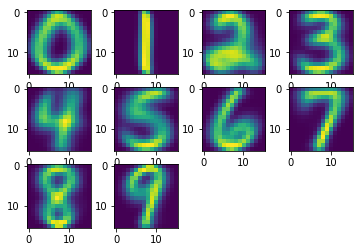

In [105]:
k=0
for i in range(10):
    image=np.reshape(arr_with_means[i],(16,16))
    plt.subplot(3,4,k+1)
    plt.imshow(image)
    k+=1
plt.show()  

### Βήμα 10


Υπολογίζουμε την ευκλείδια απόσταση (δεύτερη νόρμα) με κάθε ψηφίο (από τον μέσο όρο των πίξελ του κάθε ψηφίου) και το κατηγοριοποιούμε εκεί που απέχει λιγότερο .Από το αποτέλεσμα φαίνεται ότι ήταν επιτυχής η ταξινόμηση

In [106]:
smallest=1000000
smallest_index=0
distance = [0]*10
ar1=np.reshape(X_test[100],(16,16))
for i in range(10):
    ar2=np.reshape(arr_with_means[i],(16,16))
    distance[i]=np.linalg.norm(ar1-ar2)
    if smallest>distance[i]:
        smallest=distance[i]
        smallest_index=i
print(smallest_index,Y_test[100])

0 0.0


### Βήμα 11


Κάνουμε το ίδιο σαν λογική αλλά με πίνακα που έχει μία μεγαλύτερη διάσταση , το ποσοστό φαίνεται πως είναι 0.8141504733432985.

In [107]:
suc=0
ts = Y_test.shape[0]
sm = [10000]*ts
sm_in = [0]*ts
rows, cols = (ts, 10) 
distance= [[0]*cols]*rows
ar1=[0]*ts
for i in range(ts):
    ar1[i]=np.reshape(X_test[i],(16,16))
    for j in range(10):
        ar2 = np.reshape(arr_with_means[j],(16,16))
        distance[i][j]=np.linalg.norm(ar1[i]-ar2)
        if sm[i]>distance[i][j]:
            sm[i]=distance[i][j]
            sm_in[i]=j
for i in range(ts):
    if sm_in[i]==int(Y_test[i]):
        suc+=1
    #print(sm_in[i],Y_test[i])
print(suc/ts)

0.8141504733432985


### Βήμα 12


Υλοποιούμε την ταξινομιτή τον ευκλείδιο 

In [108]:
from sklearn.base import BaseEstimator, ClassifierMixin

class EuclideanClassifier(BaseEstimator, ClassifierMixin):  
    """Classify samples based on the distance from the mean feature value"""
    

    def __init__(self):
        self.X_mean_=[]

    def fit(self, X, y):
        in_of_256 = len(X[0])
        tr = len(y)
        dif_by_num_ar = []
        arr_divided_by_pixel_of_all_digits= []
        how_many = [0]*10  
        for i in range(10):
            arr_divided_by_pixel_of_all_digits.append([])
            dif_by_num_ar.append([])
            self.X_mean_.append([])
            for j in range(in_of_256):
                arr_divided_by_pixel_of_all_digits[i].append([])
        for i in range (tr):
            number = int(y[i])
            how_many[number]+=1
            dif_by_num_ar[number].append(X[i])
        for i in range(10):
            for j in range(in_of_256):
                for k in range(how_many[i]):
                    arr_divided_by_pixel_of_all_digits[i][j].append(dif_by_num_ar[i][k][j])
        for i in range(10):
            for j in range(in_of_256):
                self.X_mean_[i].append(stat.mean(arr_divided_by_pixel_of_all_digits[i][j]))
        return self
        raise NotImplementedError
        


    def predict(self, X):
        ts=len(X)
        suc=0
        sm = [10000]*ts
        sm_in = [0]*ts
        rows, cols = (ts, 10) 
        distance= [[0]*cols]*rows
        ar1=[0]*ts
        for i in range(ts):
            ar1[i]=X[i]
            for j in range(10):
                ar2 = self.X_mean_[j]
                distance[i][j]=np.linalg.norm(ar1[i]-ar2)
                if sm[i]>distance[i][j]:
                    sm[i]=distance[i][j]
                    sm_in[i]=j
        return sm_in
        raise NotImplementedError
    
    def score(self, X, y):
        hulio=self.predict(X)
        total=0
        pos=0
        for i in hulio:
            if i==y[pos]:
                total+=1
            pos+=1
        return (total/pos)*100
        raise NotImplementedError
        
        
        
r1 = EuclideanClassifier()
r1.fit(X_train,Y_train)
print(r1.score(X_test,Y_test))

81.41504733432984


### Βήμα 13 α

Υλοποιούμε το 5-fold-cross-validation για αρχή με δικό μας κώδικα. Βάζουμε σαν είσοδο τα 4/5 του train set για να κάνει train και το 1/5 για τεστ (κάθε φορά διαφορετικό 1/5) και παίρνουμε τα παρακάτω αποτελέσματα. Στο μεθεπόμενο κελί  υλοποιούμε την μέθοδο με την βοήθεια του sklearn.

In [109]:
parts = tr//5
r1 = EuclideanClassifier()
r1.fit(X_train[parts:],Y_train[parts:])
print(r1.score(X_train[:parts],Y_train[:parts]))
for i in range(2,6):
    r1= EuclideanClassifier()
    r1.fit(np.concatenate((X_train[:(i-1)*parts],X_train[i*parts:]), axis=0),np.concatenate((Y_train[:(i-1)*parts],Y_train[i*parts:]), axis=0)) 
    print(r1.score(X_train[(i-1)*parts:i*parts],Y_train[(i-1)*parts:i*parts]))



84.91083676268862
85.11659807956104
84.49931412894375
84.91083676268862
84.77366255144034


In [110]:
#13a
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X = np.concatenate((X_train, X_test))
y = np.concatenate((Y_train, Y_test))

#print(X.shape,y_new.shape)
scores = cross_val_score(EuclideanClassifier(), X, y, cv = KFold(n_splits = 5, random_state = 42), scoring = "accuracy")
msc = np.mean(scores)
print(msc*100)

84.07163638677287


### Βήμα 13 β


Σχεδιάζουμε τις περιοχές απόφασης με την βοήθεια της PCA που μας μειώνει από 256 τις διαστάσεις σε 2

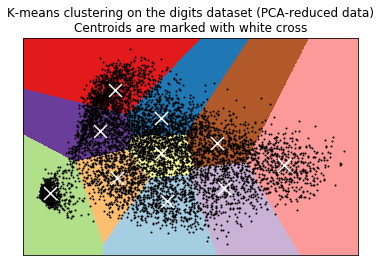

In [111]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = X_train

n_samples, n_features = data.shape
n_digits = len(np.unique(Y_train))
labels = Y_train


# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Βήμα 13 γ


Σχεδιάζουμε το learning curve 

<module 'matplotlib.pyplot' from '/home/lena/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

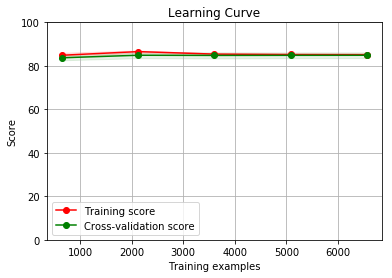

In [112]:
from sklearn.model_selection import learning_curve
import warnings

    
def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


clf = EuclideanClassifier()
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, Y_train, cv = 10, n_jobs = 4,train_sizes=np.linspace(.1, 1.0, 5))    


plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 100))




